# Simulation Analysis

Here, we examine the results of our simulations. We present kernel density estimates to compare the median UHI between the 25th and 75th percentile of median income within each urban area, normalizing by the number of urban areas.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Import Quartile Results

In [9]:
baseline            = pd.read_csv('tables/quartiles/baseline.csv')
albedo              = pd.read_csv('tables/quartiles/albedo.csv')
afforest_50         = pd.read_csv('tables/quartiles/afforest_50.csv')
afforest_100        = pd.read_csv('tables/quartiles/afforest_100.csv')
albedo_afforest_50  = pd.read_csv('tables/quartiles/albedo_afforest_50.csv')
albedo_afforest_100 = pd.read_csv('tables/quartiles/albedo_afforest_100.csv')

In [10]:
dfs = [baseline, albedo, afforest_50, afforest_100, albedo_afforest_50, albedo_afforest_100]

## Map of Baseline and Simulated Results

In [11]:
centroids = pd.read_csv('data/Centroids_USUHI.csv', usecols=['Lat','Lon','Urban_name'])

### CUHI Summer Day Difference

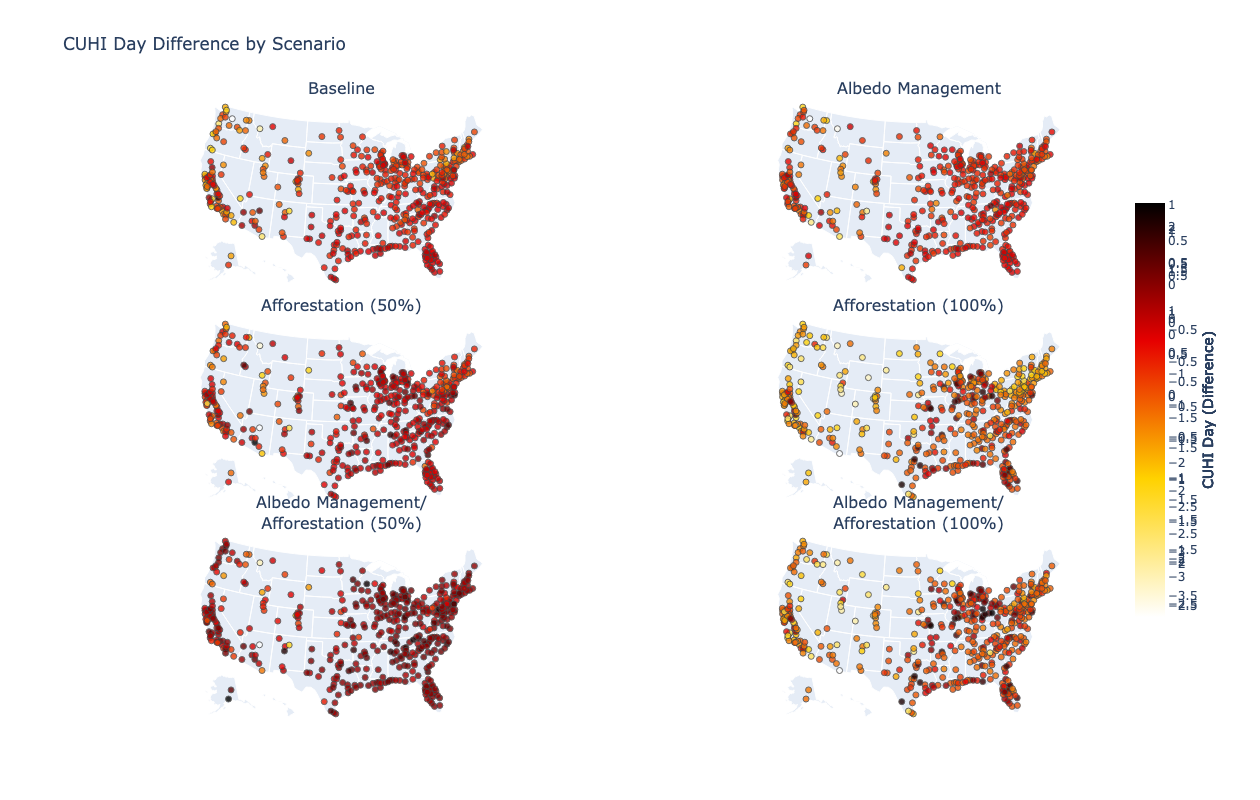

In [13]:
nrows = 3; ncols = 2
data_col = 'CUHI Day (Difference)'
subtitles = ['Baseline', 'Albedo', 'Afforest50', 'Afforest100', 'Albedo/Afforest50', 'Albedo/Afforest100']
# Initialize figure with subplots
fig = make_subplots(
    rows=nrows, cols=ncols, specs=[
        [{"type": "scattergeo"}, {"type": "scattergeo"}], 
        [{"type": "scattergeo"}, {"type": "scattergeo"}],
        [{"type": "scattergeo"}, {"type": "scattergeo"}],        
    ], subplot_titles=('Baseline', 'Albedo Management', 'Afforestation (50%)', 'Afforestation (100%)',
                       'Albedo Management/<br>Afforestation (50%)', 'Albedo Management/<br>Afforestation (100%)'),
    horizontal_spacing=0.05, vertical_spacing=0.05
)

df = dfs[0].merge(centroids, on='Urban_name')
fig.add_trace(go.Scattergeo(
    lon = df['Lon'],
    lat = df['Lat'],
    text = data_col + ': ' + df[data_col].round(2).astype(str)+'<br>'+ df['Urban_name'],
    mode = 'markers',
    marker_color = df[data_col],
    marker = dict(
                    size = 6,
                    opacity = 0.8,
                    reversescale = True,
                    autocolorscale = False,
                    symbol = 'circle',
                    line = dict(
                        width=1,
                        color='rgba(102, 102, 102)'
                    ),
                    colorscale = 'Hot',
                    cmin = df[data_col].min(),
                    color = df[data_col],
                    cmax = df[data_col].max(),
                    colorbar=dict(
                        title=dict(
                            text=data_col, side='right'
                        ),
                        x=0.95, len=0.7           
                    )
                 ),
    name='Baseline'), 
    row=1, col=1)

df = dfs[1].merge(centroids, on='Urban_name')
fig.add_trace(go.Scattergeo(
    lon = df['Lon'],
    lat = df['Lat'],
    text = data_col + ': ' + df[data_col].round(2).astype(str)+'<br>'+ df['Urban_name'],
    mode = 'markers',
    marker_color = df[data_col],
    marker = dict(
                    size = 6,
                    opacity = 0.8,
                    reversescale = True,
                    autocolorscale = False,
                    symbol = 'circle',
                    line = dict(
                        width=1,
                        color='rgba(102, 102, 102)'
                    ),
                    colorscale = 'Hot',
                    cmin = df[data_col].min(),
                    color = df[data_col],
                    cmax = df[data_col].max(),
                    colorbar=dict(
                        title=dict(
                            text=data_col, side='right'
                        ),
                        x=0.95, len=0.7           
                    )
                 ),
    name='Albedo Management'), 
    row=1, col=2)

df = dfs[2].merge(centroids, on='Urban_name')
fig.add_trace(go.Scattergeo(
    lon = df['Lon'],
    lat = df['Lat'],
    text = data_col + ': ' + df[data_col].round(2).astype(str)+'<br>'+ df['Urban_name'],
    mode = 'markers',
    marker_color = df[data_col],
    marker = dict(
                    size = 6,
                    opacity = 0.8,
                    reversescale = True,
                    autocolorscale = False,
                    symbol = 'circle',
                    line = dict(
                        width=1,
                        color='rgba(102, 102, 102)'
                    ),
                    colorscale = 'Hot',
                    cmin = df[data_col].min(),
                    color = df[data_col],
                    cmax = df[data_col].max(),
                    colorbar=dict(
                        title=dict(
                            text=data_col, side='right'
                        ),
                        x=0.95, len=0.7           
                    )
                 ),
    name='Afforestation (50%)'), 
    row=2, col=1)

df = dfs[3].merge(centroids, on='Urban_name')
fig.add_trace(go.Scattergeo(
    lon = df['Lon'],
    lat = df['Lat'],
    text = data_col + ': ' + df[data_col].round(2).astype(str)+'<br>'+ df['Urban_name'],
    mode = 'markers',
    marker_color = df[data_col],
    marker = dict(
                    size = 6,
                    opacity = 0.8,
                    reversescale = True,
                    autocolorscale = False,
                    symbol = 'circle',
                    line = dict(
                        width=1,
                        color='rgba(102, 102, 102)'
                    ),
                    colorscale = 'Hot',
                    cmin = df[data_col].min(),
                    color = df[data_col],
                    cmax = df[data_col].max(),
                    colorbar=dict(
                        title=dict(
                            text=data_col, side='right'
                        ),
                        x=0.95, len=0.7           
                    )
                 ),
    name='Afforestation (100%)'), 
    row=2, col=2)


df = dfs[4].merge(centroids, on='Urban_name')
fig.add_trace(go.Scattergeo(
    lon = df['Lon'],
    lat = df['Lat'],
    text = data_col + ': ' + df[data_col].round(2).astype(str)+'<br>'+ df['Urban_name'],
    mode = 'markers',
    marker_color = df[data_col],
    marker = dict(
                    size = 6,
                    opacity = 0.8,
                    reversescale = True,
                    autocolorscale = False,
                    symbol = 'circle',
                    line = dict(
                        width=1,
                        color='rgba(102, 102, 102)'
                    ),
                    colorscale = 'Hot',
                    cmin = df[data_col].min(),
                    color = df[data_col],
                    cmax = df[data_col].max(),
                    colorbar=dict(
                        title=dict(
                            text=data_col, side='right'
                        ),
                        x=0.95, len=0.7           
                    )
                 ),
    name='Albedo Management/Afforestation (50%)'), 
    row=3, col=1)

df = dfs[5].merge(centroids, on='Urban_name')
fig.add_trace(go.Scattergeo(
    lon = df['Lon'],
    lat = df['Lat'],
    text = data_col + ': ' + df[data_col].round(2).astype(str)+'<br>'+ df['Urban_name'],
    mode = 'markers',
    marker_color = df[data_col],
    marker= dict(
                    size = 6,
                    opacity = 0.8,
                    reversescale = True,
                    autocolorscale = False,
                    symbol = 'circle',
                    line = dict(
                        width=1,
                        color='rgba(102, 102, 102)'
                    ),
                    colorscale = 'Hot',
                    cmin = df[data_col].min(),
                    color = df[data_col],
                    cmax = df[data_col].max(),
                    colorbar=dict(
                        title=dict(
                            text=data_col, side='right'
                        ),
                        x=0.95, len=0.7           
                    )
                 ),
    name='Albedo Management/Afforestation (100%)'), 
    row=3, col=2)

fig.update_layout(
    title_text='CUHI Day Difference by Scenario',
    geo1=dict(scope='usa'), geo2=dict(scope='usa'), geo3=dict(scope='usa'),
    geo4=dict(scope='usa'), geo5=dict(scope='usa'), geo6=dict(scope='usa'),
    showlegend=False, height=800, width=800
)

## Strip Plots of Baseline and Simulated Predictions

In [14]:
# Concatenate the dataframes for swarm plot purposes
cat_df = pd.concat(dfs)

# Add a column to differentiate the baseline and each simulation
n_cities = 493
cats     = ['Baseline', 'Albedo', 'Afforest50', 'Afforest100', 'Albedo/Afforest50', 'Albedo/Afforest100']
cat_col  = ([cats[0]] * n_cities)+ ([cats[1]] * n_cities) + ([cats[2]] * n_cities) + ([cats[3]] * n_cities) + ([cats[4]] * n_cities) + ([cats[5]] * n_cities)

cat_df['Scenario'] = cat_col

In [15]:
cat_df.head()

,Urban_geoid,Urban_name,Clim_zone,Coastal?,CUHI Day (25th %tile),CUHI Day (75th %tile),CUHI Day (Difference),CUHI Night (25th %tile),CUHI Night (75th %tile),CUHI Night (Difference),SUHI Day (25th %tile),SUHI Day (75th %tile),SUHI Day (Difference),SUHI Night (25th %tile),SUHI Night (75th %tile),SUHI Night (Difference),Scenario
0,280,"Abilene, TX",Temperate,False,0.153134,0.128629,-0.024505,0.170664,-0.069281,-0.239945,0.662531,1.043478,0.380947,0.403857,0.140264,-0.263592,Baseline
1,955,"Albany, OR",Temperate,False,0.384694,-0.025450,-0.410144,0.729594,-0.048602,-0.778196,3.763031,-0.546957,-4.309988,2.004197,0.147296,-1.856902,Baseline
2,1171,"Albuquerque, NM",Arid,False,0.444491,-0.266217,-0.710707,0.903729,0.512427,-0.391302,1.153673,0.258035,-0.895638,1.527913,0.797699,-0.730213,Baseline
3,1279,"Alexandria, LA",Temperate,False,0.220576,-0.057764,-0.278339,0.257233,-0.017049,-0.274282,2.810638,-1.183124,-3.993762,0.583172,-0.206620,-0.789792,Baseline
4,1765,"Alton, IL--MO",Temperate,False,0.152763,-0.154135,-0.306898,0.388192,-0.270974,-0.659166,1.704938,-1.714499,-3.419438,0.975970,-0.773880,-1.749850,Baseline


### CUHI Day - Overall

<Axes: xlabel='CUHI Day (Difference)', ylabel='Scenario'>

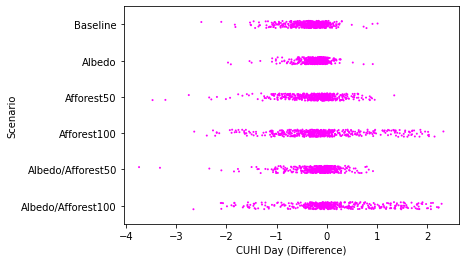

In [16]:
sns.stripplot(data=cat_df, x='CUHI Day (Difference)', y='Scenario', size=2, color='magenta')

### CUHI Day by Climate Zone

<Axes: xlabel='CUHI Day (Difference)', ylabel='Scenario'>

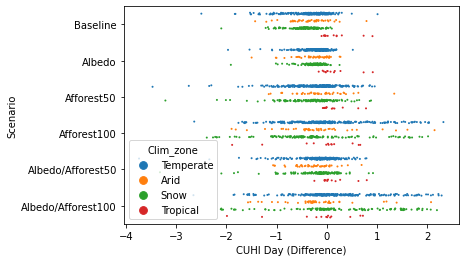

In [17]:
sns.stripplot(data=cat_df, x='CUHI Day (Difference)', y='Scenario', hue='Clim_zone', size=2, dodge=True)

### CUHI Day by Coastal

<Axes: xlabel='CUHI Day (Difference)', ylabel='Scenario'>

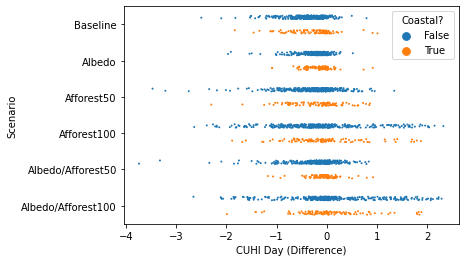

In [18]:
sns.stripplot(data=cat_df, x='CUHI Day (Difference)', y='Scenario', hue='Coastal?', size=2, dodge=True)

### CUHI Day by Climate Zone and Coastal

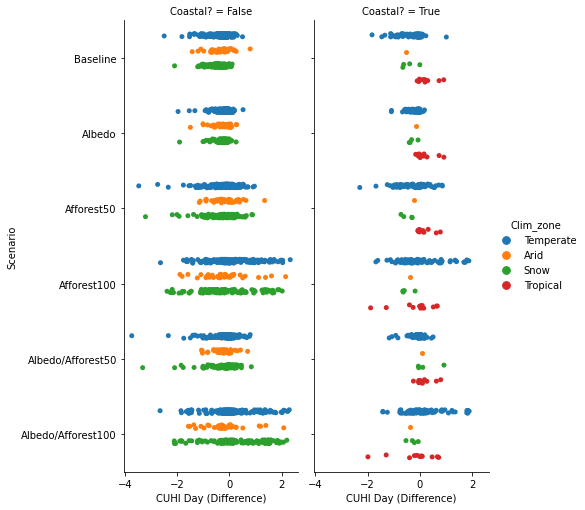

In [19]:
sns.catplot(data=cat_df, x='CUHI Day (Difference)', y='Scenario', hue='Clim_zone', col="Coastal?", aspect=.5, dodge=True, height=7)

## Kernel Density Estimates of Baseline and Simulated Predictions

### CUHI Day

Text(0.5, 0.98, 'CUHI Day')

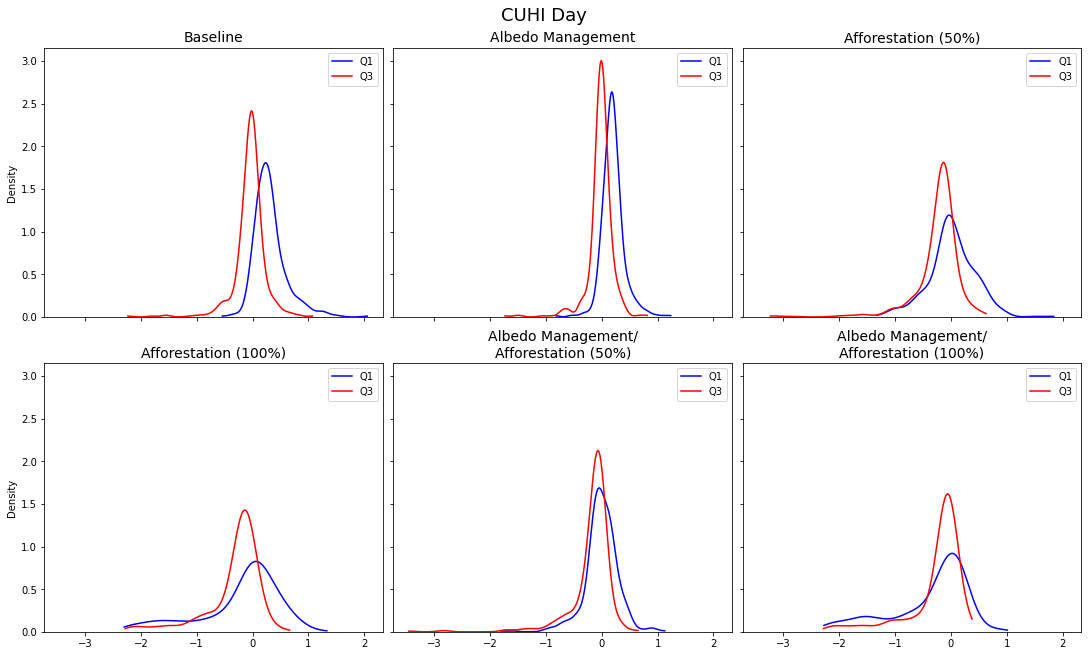

In [20]:
nrows = 2; ncols = 3
titles  = ['Baseline', 'Albedo Management', 'Afforestation (50%)', 'Afforestation (100%)', 
           'Albedo Management/\nAfforestation (50%)', 'Albedo Management/\nAfforestation (100%)']
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15,9), constrained_layout=True, sharey=True, sharex=True)
for k, ax in enumerate(axes.flatten()):
    temp_df = dfs[k]
    sns.kdeplot(temp_df['CUHI Day (25th %tile)'], cut=0, color='blue', label='Q1', ax=ax)
    sns.kdeplot(temp_df['CUHI Day (75th %tile)'], cut=0, color='red', label='Q3', ax=ax)
    ax.set(xlabel=None)
    ax.set_title(titles[k], fontsize=14)
    ax.legend()
plt.suptitle('CUHI Day', fontsize=18)